In [4]:
import re
import docx2txt
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
filename = '/content/John_Guy.docx'

In [16]:
def extract_languages(filename):
    # read in word file
    result = docx2txt.process(filename)
    language_pattern = re.search(r'Languages:[A-Za-z,\s0-9]*\.',result)
    language_line = language_pattern.group(0)

    languages = re.sub("Languages: ","", language_line)
    languages = re.sub("\.","",languages)
    languages_clean = languages.split(', ')
    print(languages_clean)
    return languages_clean

In [17]:
john_languages = extract_languages(filename)

['Python', 'R', 'CSS', 'SQL']


In [18]:
def draw_graph(dict):
    # create a directed-graph from a dataframe
    G=nx.from_dict_of_lists(dict,create_using=nx.MultiDiGraph())
    plt.figure(figsize=(12,12))
    
    pos = nx.spring_layout(G)
    nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, node_size = 4500, font_size = 18)
    plt.show()

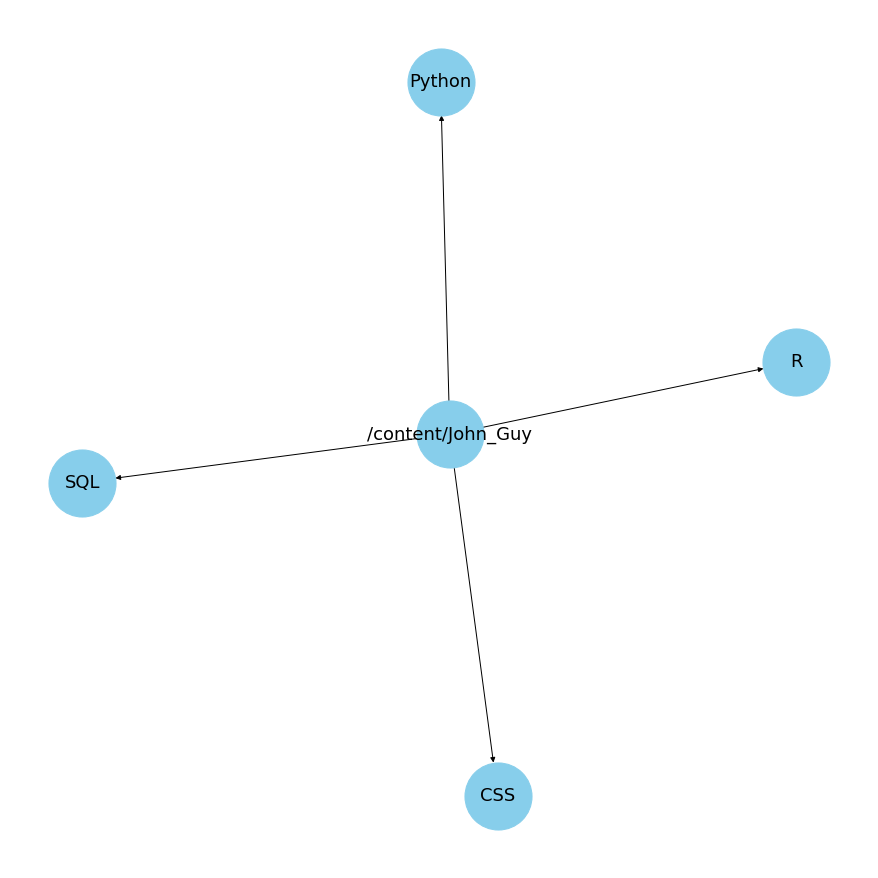

In [20]:
edge_dict = {}
edge_dict[filename.split('.')[0]] = john_languages

draw_graph(edge_dict)

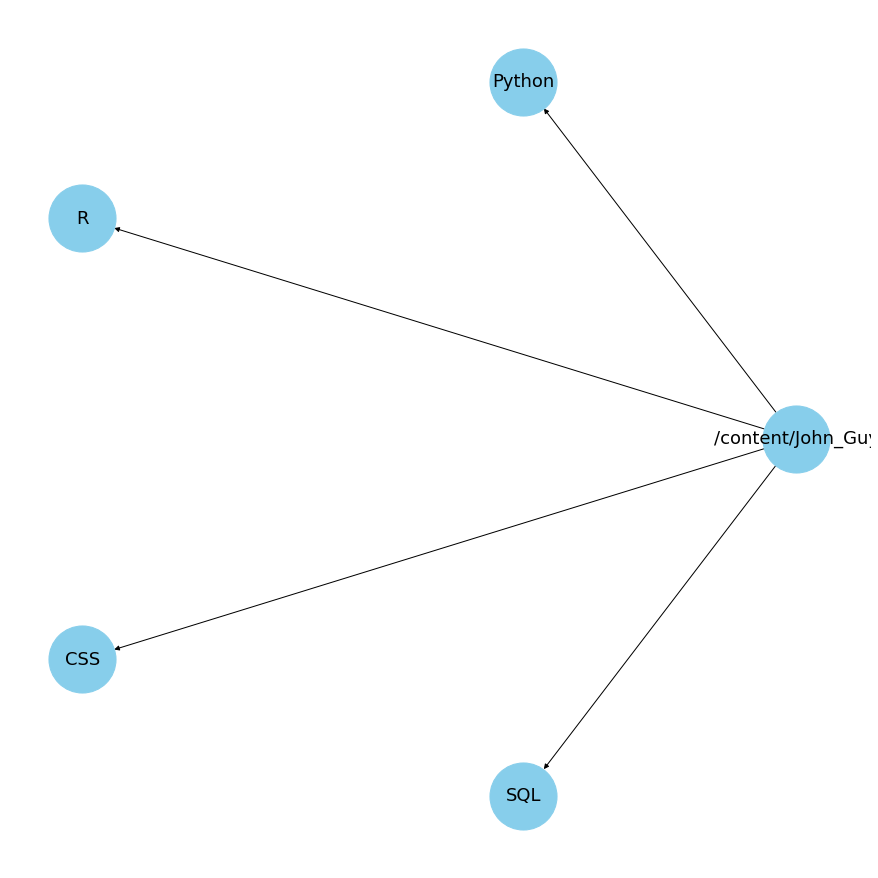

In [25]:
G=nx.from_dict_of_lists(edge_dict, 
                         create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.circular_layout(G) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=4500, edge_cmap=plt.cm.Blues, pos = pos, font_size=18)
plt.show()

In [22]:
def get_max_degree_node(list_of_nodes, G):
    max_degree=0
    all_remaining_nodes = [x for x in G.nodes() if x not in list_of_nodes]
    max_node=all_remaining_nodes[0]
    for node in all_remaining_nodes:
            degree = G.degree(node)
            if degree>max_degree:
                    max_degree = degree
                    max_node = node
    return max_degree, max_node

In [26]:
max_skill_degree, max_skill_node = get_max_degree_node(filename.split('.')[0], G)
print(max_skill_node)
print(max_skill_degree)

Python
1


In [27]:
skill_list = john_languages
max_languages_degree, max_languages_node = get_max_degree_node(skill_list,G)
print(max_languages_node)
print(max_languages_degree)

/content/John_Guy
4
